In [5]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [6]:
data = np.loadtxt("Dbig.txt")
np.random.shuffle(data)
candidate_training_set = data[:8192]
test_set = data[8192:]
D_32 = candidate_training_set[:32]
D_128 = candidate_training_set[:128]
D_512 = candidate_training_set[:512]
D_2048 = candidate_training_set[:2048]
D_8192 = candidate_training_set
datasets = [D_32, D_128, D_512, D_2048, D_8192]

In [9]:
# Assuming the last column is the label for each dataset
X_test = test_set[:, :-1]
y_test = test_set[:, -1]

ns = []  # List to store number of nodes for each dataset
errors = []  # List to store test set errors for each dataset

for D in datasets:
    X_train = D[:, :-1]
    y_train = D[:, -1]
    
    # Train decision tree
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    # Number of nodes in the tree
    n = clf.tree_.node_count
    ns.append(n)
    
    # Test set error
    y_pred = clf.predict(X_test)
    err_n = np.mean(y_pred != y_test)
    errors.append(err_n)

for i in range(5):
    print(f"when n = {ns[i]}, err_n is {errors[i]}")

when n = 7, err_n is 0.17146017699115043
when n = 17, err_n is 0.09789823008849557
when n = 49, err_n is 0.043694690265486724
when n = 109, err_n is 0.02820796460176991
when n = 257, err_n is 0.011615044247787611


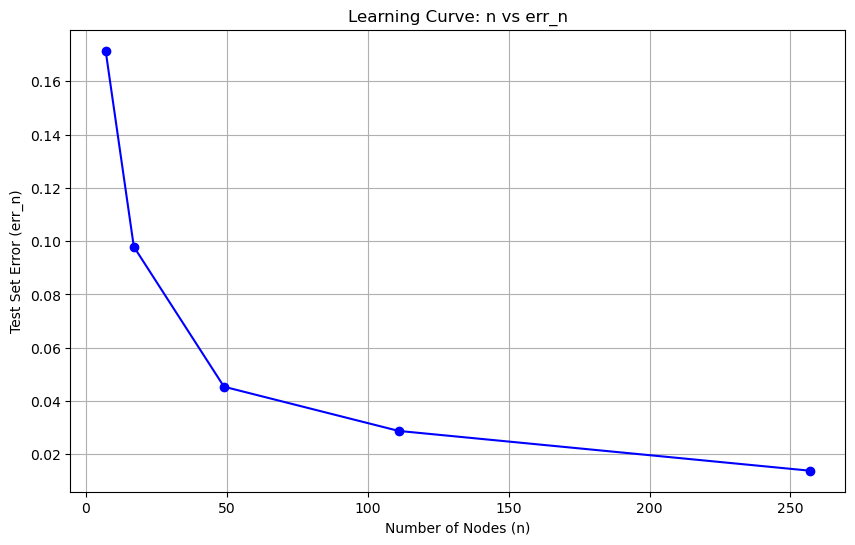

In [8]:
def plot_learning_curve(ns, errors):
    plt.figure(figsize=(10, 6))
    plt.plot(ns, errors, '-o', color='blue')
    plt.xlabel('Number of Nodes (n)')
    plt.ylabel('Test Set Error (err_n)')
    plt.title('Learning Curve: n vs err_n')
    plt.grid(True)
    plt.show()

plot_learning_curve(ns, errors)